In [1]:
import os
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import torch
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

In [3]:
to_save_dir="../edges/"
data_dir="../../data/AD/processed1/"
genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")


cell_types=['Astrocyte', 'Chandelier', 'Endothelial', 'L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Lamp5', 'Lamp5 Lhx6', 'Microglia-PVM', 'OPC', 'Oligodendrocyte', 'Pax6', 'Pvalb', 'Sncg', 'Sst', 'Sst Chodl', 'VLMC', 'Vip']

samples=['H20.33.004.Cx26.MTG.02.007.1.02.04', 'H20.33.004.Cx26.MTG.02.007.1.01.04', 'H20.33.004.Cx26.MTG.02.007.1.01.05', 'H21.33.011.Cx26.MTG.02.007.3.01.06', 'H21.33.016.Cx26.MTG.02.007.3.01.01', 'H21.33.028.CX28.MTG.02.007.1.01.01', 'H21.33.038.Cx20.MTG.02.007.3.01.02', 'H21.33.040.Cx22.MTG.02.007.3.03.03', 'H21.33.022.Cx26.MTG.02.007.2.M.02', 'H21.33.038.Cx20.MTG.02.007.3.01.04', 'H21.33.005.Cx18.MTG.02.007.02.04', 'H20.33.012.Cx24.MTG.02.007.1.01.01', 'H20.33.012.Cx24.MTG.02.007.1.03.03', 'H21.33.023.Cx26.MTG.02.007.1.03.01', 'H20.33.025.Cx28.MTG.02.007.1.01.02', 'H21.33.012.Cx26.MTG.02.007.1.01.06', 'H20.33.025.Cx28.MTG.02.007.1.01.04', 'H20.33.044.Cx26.MTG.02.007.1.01.04', 'H21.33.023.Cx26.MTG.02.007.1.03.05', 'H20.33.004.Cx26.MTG.02.007.1.02.03', 'H21.33.016.Cx26.MTG.02.007.3.01.02', 'H20.33.040.Cx25.MTG.02.007.1.01.03', 'H21.33.001.Cx22.MTG.02.007.1.01.04', 'H20.33.012.Cx24.MTG.02.007.1.03.02', 'H21.33.015.Cx26.MTG.02.007.1.2', 'H21.33.022.Cx26.MTG.02.007.2.M.03', 'H21.33.005.Cx18.MTG.02.007.02.03', 'H21.33.032.CX24.MTG.02.007.1.01.04', 'H21.33.022.Cx26.MTG.02.007.2.M.04', 'H21.33.006.Cx28.MTG.02.007.1.01.09.03', 'H21.33.015.Cx26.MTG.02.007.1.0', 'H20.33.035.Cx26.MTG.02.007.1.01.03', 'H20.33.015.Cx24.MTG.02.007.1.03.03', 'H21.33.021.Cx26.MTG.02.007.1.04', 'H21.33.025.CX26.MTG.02.007.4.01.04', 'H20.33.025.Cx28.MTG.02.007.1.01.06', 'H21.33.014.CX26.MTG.02.007.1.02.02', 'H21.33.040.Cx22.MTG.02.007.3.03.01', 'H21.33.016.Cx26.MTG.02.007.3.01.03', 'H21.33.021.Cx26.MTG.02.007.1.06', 'H21.33.013.Cx24.MTG.02.007.1.06', 'H21.33.015.Cx26.MTG.02.007.1.1', 'H20.33.001.CX28.MTG.02.007.1.02.03', 'H21.33.028.Cx28.MTG.02.007.1.02.04', 'H21.33.019.Cx30.MTG.02.007.5.01.02', 'H20.33.044.Cx26.MTG.02.007.1.01.03', 'H21.33.011.Cx26.MTG.02.007.3.01.04', 'H21.33.006.Cx28.MTG.02.007.1.01.09.04', 'H21.33.025.CX26.MTG.02.007.4.01.06', 'H21.33.012.Cx26.MTG.02.007.1.01.05', 'H20.33.015.CX24.MTG.02.007.1.03.01', 'H21.33.019.Cx30.MTG.02.007.5.0', 'H20.33.035.Cx26.MTG.02.007.1.01.04', 'H21.33.012.Cx26.MTG.02.007.1.01.04', 'H21.33.031.CX24.MTG.02.007.1.01.01', 'H21.33.040.Cx22.MTG.02.007.3.03.04', 'H20.33.015.CX24.MTG.02.007.1.03.02', 'H21.33.028.Cx28.MTG.02.007.1.02.02', 'H21.33.011.Cx26.MTG.02.007.3.01.05', 'H20.33.004.Cx26.MTG.02.007.1.02.02', 'H21.33.023.Cx26.MTG.02.007.1.03.04', 'H21.33.031.CX24.MTG.02.007.1.01.02', 'H20.33.001.CX28.MTG.02.007.1.02.02', 'H21.33.006.Cx28.MTG.02.007.1.01.09.02', 'H20.33.001.Cx28.MTG.02.007.1.01.03', 'H21.33.025.CX26.MTG.02.007.4.01.02', 'H20.33.040.Cx25.MTG.02.007.1.01.04', 'H21.33.001.Cx22.MTG.02.007.1.01.03', 'H20.33.044.Cx26.MTG.02.007.1.01.02']

cell_type_pair_sequence=[]
for cell_typei in cell_types:
    for cell_typej in cell_types:
        cell_type_pair_sequence.append(cell_typei+"->"+cell_typej)

meta_rank={
  "Overall AD neuropathological Change": {"Not AD": 1, "Low": 2, "Intermediate": 3, "High": 4},
  "Thal": {"Thal 0": 1, "Thal 1": 2, "Thal 2": 3, "Thal 3": 4, "Thal 4": 5, "Thal 5": 6},
  "Braak": {"Braak 0": 1, "Braak II": 2, "Braak III": 3, "Braak IV": 4, "Braak V": 5, "Braak VI": 6},
  "CERAD score": {"Absent": 1, "Sparse": 2, "Moderate": 3, "Frequent": 4},
  "Overall CAA Score": {"Not identified": 1, "Mild": 2, "Moderate": 3},
  "Highest Lewy Body Disease": {
    "Not Identified (olfactory bulb not assessed)": 1,
    "Not Identified (olfactory bulb assessed)": 2,
    "Olfactory bulb only": 3,
    "Brainstem-predominant": 4,
    "Limbic (Transitional)": 5,
    "Neocortical (Diffuse)": 6
  },
  "Atherosclerosis": {"None": 1, "Mild": 2, "Moderate": 3},
  "Arteriolosclerosis": {"Mild": 1, "Moderate": 2, "Severe": 3},
  "LATE": {"Not Identified": 1, "LATE Stage 1": 2, "LATE Stage 2": 3, "LATE Stage 3": 4},
  "Cognitive Status": {"No dementia": 1, "Dementia": 2}
}
print(meta_rank.keys())
print(genes)

dict_keys(['Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status'])
['PRRT4', 'GRIP2', 'FOXP2', 'PDZD2', 'KIAA1217', 'PALMD', 'LRRC4C', 'ASIC2', 'NPAS3', 'LUZP2', 'GRIN2A', 'NLGN1', 'NTNG2', 'TACR1', 'PDGFD', 'ANK1', 'DLX1', 'CBLN2', 'ZNF804A', 'CACNA2D3', 'CDH6', 'CD22', 'ETNPPL', 'CALB1', 'TSHZ2', 'FGF13', 'KIRREL3', 'ROBO1', 'RBFOX3', 'ASTN2', 'ID3', 'TH', 'TENM2', 'ZMAT4', 'CLSTN2', 'SEMA6D', 'HPSE2', 'BTBD11', 'LRP1B', 'NOS1', 'GPC5', 'SNTB1', 'COL11A1', 'TMEM255A', 'SATB2', 'SORCS3', 'FBXL7', 'GRM8', 'GALNTL6', 'NOSTRIN', 'DCC', 'SOX6', 'MEIS2', 'STXBP6', 'SMYD1', 'SCUBE1', 'LAMA4', 'CNTN5', 'GRM7', 'KCNMB2', 'CUX2', 'LAMP5', 'SLIT3', 'TAFA1', 'PRKG1', 'CSMD1', 'CNTNAP5', 'NFIA', 'FRMPD4', 'GRID2', 'HS6ST3', 'SORCS1', 'ATRNL1', 'ADAMTS3', 'SLC24A2', 'RBFOX1', 'TMEM132D', 'NKAIN2', 'PEX5L', 'TNR', 'DGKG', 'RFX3', 'UNC5B', 'HTR2A', 'RGS12', 'CACHD1',

In [4]:
metadata_df = pd.read_csv('metadata.csv', index_col=0)
#print(np.unique(metadata_df["Braak"].values,return_counts=True))
common_samples=list(set(samples).intersection(set(metadata_df.index.tolist())))

useful_sample=[i for i in samples if i in common_samples]
useful_index=[(i in useful_sample) for i in samples]

In [5]:
from scipy.stats import norm, chi2
from statsmodels.stats.multitest import multipletests

def filter_z_score(data1, type_I_cutoff=0.01, type_II_cutoff=0.01):
    data=np.mean(data1,axis=0,keepdims=True)*np.sqrt(data1.shape[0])
    # Convert z-scores to p-values (two-tailed)
    p_values = 2 * (1 - norm.cdf(np.abs(data)))

    # Shape of data
    b, t, g = data.shape

    # Initialize an array to hold adjusted p-values
    adjusted_p_values = np.zeros_like(data)
    p_cutoffs = np.zeros_like(data)

    # Adjust p-values using the BH method along axis=1
    for i in range(b):
        for j in range(g):
            # Extract the p-values for this particular set
            original_p_values = p_values[i, :, j]
            # Apply BH correction
            _, adjusted_pvals, _, _ = multipletests(original_p_values, alpha=0.05, method='bonferroni')
            adjusted_p_values[i, :, j] = adjusted_pvals

            if np.sum(adjusted_pvals<type_I_cutoff)<=0:
                p_cutoffs[i, :, j]=np.ones_like(adjusted_pvals)*0.5
                continue
            p_adj_cutoffj=np.max(original_p_values[adjusted_pvals<type_I_cutoff])
            p_cutoffs[i, :, j]=np.ones_like(adjusted_pvals)*p_adj_cutoffj
            
    alphas=np.abs(norm.ppf(p_cutoffs.flatten()/2).reshape(p_cutoffs.shape))
    type_II_error=np.abs(norm.cdf(-np.abs(data)+alphas)-norm.cdf(-np.abs(data)-alphas))
    flags=(adjusted_p_values > type_I_cutoff) | (type_II_error > type_II_cutoff)
    return ~flags

def fisher_combine_test(z_scores,cutoff=0.01,one_dim_adj=True):
    # Convert z-scores to p-values
    p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))
    
    # Initialize tensor for Fisher's combined test results
    t, c = z_scores.shape[1], z_scores.shape[2]
    combined_p_values = np.zeros((t, c))
    
    # Fisher combine test for each (t, c)
    for i in range(t):
        for j in range(c):
            p_vec = p_values[:, i, j]
            chi_stat = -2 * np.sum(np.log(p_vec))
            deg_freedom = 2 * len(p_vec)
            combined_p_values[i, j] = 1 - chi2.cdf(chi_stat, deg_freedom)
    
    # Adjust p-values using the Benjamini-Hochberg method
    adjusted_p_values = np.zeros_like(combined_p_values)
    if one_dim_adj:
        for j in range(c):
            _, corrected_p, _, _ = multipletests(combined_p_values[:, j], method='fdr_bh')
            adjusted_p_values[:, j] = corrected_p
    else:
        adjusted_p_values=multipletests(combined_p_values.flatten(), method='fdr_bh')[1].reshape(combined_p_values.shape)
    
    # Unsqueezing to shape (1, t, c)
    data=np.expand_dims(adjusted_p_values, axis=0)
    flag=(data<cutoff)
    return flag

In [6]:
probablity_z=np.load("./z_regressionp_adapt/z_values.npy")
strength=np.load("./z_strength_spatial_neighbor_adapt/z_values.npy")
probablity_z[probablity_z>10]=10

#print(np.quantile(np.abs(probablity_z),0.99))
#strength=1/(1-np.abs(strength))

probablity_z1=filter_z_score(probablity_z,type_I_cutoff=0.001, type_II_cutoff=0.001)
probablity_z2=fisher_combine_test(probablity_z,cutoff=0.001,one_dim_adj=False)
probablity_z1=probablity_z1&probablity_z2
#strength=np.where(probablity_z!=0,np.abs(strength),np.zeros_like(strength))
strength=np.where(probablity_z1!=0,strength,np.zeros_like(strength))

In [7]:
z=np.mean(probablity_z,axis=0,keepdims=True)*np.sqrt(probablity_z.shape[0])
z[probablity_z1==False]=0
z=z[0]
df_summary=pd.DataFrame(z,columns=genes,index=cell_type_pair_sequence)
df_summary.to_csv("all.csv")

In [8]:
gene_to_analyze='RORB'#"all"#"TNR"#"HTR2A"#"NOS1"#"NRG1"#"CD74"#"PAX6"#"GRIK3"#"SORCS1"#"GRN"#"TNR"#"HTR2A"#"GRIK3"#"HTR2A_yes"#"all"#"NRG1"#"NOS1"#"NOS1"#

adata=sc.AnnData(strength[useful_index,:,genes.index(gene_to_analyze)])
adata.var_names=cell_type_pair_sequence
for metai in meta_rank.keys():
    adata.obs[metai]=metadata_df.loc[useful_sample,metai].values
#adata=adata[:,]
print(adata.shape,np.sum(np.sum(adata.X!=0,axis=0)>=10))
print(np.array(cell_type_pair_sequence)[np.sum(adata.X!=0,axis=0)>=10])
for i in range(adata.shape[0]):
    print(adata[i,cell_type_pair_sequence.index("Microglia-PVM->L2/3 IT")].X,adata.obs['Cognitive Status'][i])

(69, 576) 67
['Astrocyte->Astrocyte' 'Astrocyte->L4 IT' 'Astrocyte->L5 IT'
 'Endothelial->L2/3 IT' 'Endothelial->Oligodendrocyte'
 'L2/3 IT->Astrocyte' 'L2/3 IT->L2/3 IT' 'L2/3 IT->L4 IT' 'L2/3 IT->L5 IT'
 'L2/3 IT->Pvalb' 'L4 IT->Astrocyte' 'L4 IT->Chandelier'
 'L4 IT->Endothelial' 'L4 IT->L2/3 IT' 'L4 IT->L4 IT' 'L4 IT->L5 IT'
 'L4 IT->L6 IT Car3' 'L4 IT->Lamp5' 'L4 IT->Lamp5 Lhx6'
 'L4 IT->Microglia-PVM' 'L4 IT->OPC' 'L4 IT->Oligodendrocyte'
 'L4 IT->Pvalb' 'L4 IT->Sst' 'L4 IT->VLMC' 'L4 IT->Vip' 'L5 IT->L2/3 IT'
 'L5 IT->L6 IT' 'L5 IT->Microglia-PVM' 'L5 IT->OPC'
 'L5 IT->Oligodendrocyte' 'L5 IT->Sst' 'L5 IT->Vip' 'L5/6 NP->L4 IT'
 'L6 CT->L4 IT' 'L6 CT->L5 IT' 'L6 CT->Microglia-PVM'
 'L6 CT->Oligodendrocyte' 'L6 IT->Astrocyte' 'L6 IT->Endothelial'
 'L6 IT->L4 IT' 'L6 IT->L5 IT' 'L6 IT->Microglia-PVM' 'L6 IT->OPC'
 'L6 IT->Oligodendrocyte' 'L6 IT->Pvalb' 'L6 IT->Sst'
 'L6 IT Car3->Oligodendrocyte' 'L6b->Astrocyte' 'L6b->L2/3 IT'
 'L6b->L4 IT' 'L6b->Microglia-PVM' 'L6b->Oligodendroc

In [15]:
import matplotlib.colors as colors
def extract_genes_and_pvals_by_group(adata, group_index, cutoff=0.05, up=True):
    # Extracting gene names and p-values from the adata object
    gene_names = adata.uns['rank_genes_groups']['names']
    p_values = adata.uns['rank_genes_groups']['pvals']
    logfoldchanges=adata.uns['rank_genes_groups']['logfoldchanges']
    p_adj=adata.uns['rank_genes_groups']['pvals_adj']
    
    # Lists to hold filtered gene names and their corresponding p-values
    filtered_genes = []
    filtered_padj = []
    filtered_pvals = []
    
    # Iterate through each group in the gene names and p-values
    for gene_group, pval_group, p_group,fold_group in zip(gene_names, p_adj, p_values, logfoldchanges):
        gene = gene_group[group_index]
        padj = pval_group[group_index]
        foldchange=fold_group[group_index]
        pval=p_group[group_index]
        
        # Check if p-value is below the cutoff and add to the lists if it is
        #print(pval,foldchange)
        if pval < cutoff and ((foldchange>0)==up):
            filtered_genes.append(gene)
            filtered_pvals.append(pval)
            filtered_padj.append(padj)
    
    filtered_genes=np.array(filtered_genes)
    filtered_pvals=np.array(filtered_pvals)
    filtered_padj=np.array(filtered_padj)
    order_arg=np.argsort(filtered_pvals)
    filtered_genes=filtered_genes[order_arg]
    filtered_pvals=filtered_pvals[order_arg]
    filtered_padj=filtered_padj[order_arg]
    print(len(filtered_genes),filtered_genes,filtered_padj)
    return filtered_genes, filtered_pvals, filtered_padj

def plot_adata(adata1,color,n_genes=10):
    adata=adata1[:,np.sum(adata1.X!=0,axis=0)>=10]

    #sc.pp.scale(adata)
    
    print(adata.shape)
    print(adata.X)
    
    sc.tl.rank_genes_groups(adata,groupby=color,method='t-test',corr_method='benjamini-hochberg')
    sc.pl.rank_genes_groups_heatmap(adata,n_genes=n_genes,swap_axes=True,save="CCI_strength.pdf")#,figsize=(8,6),norm=colors.PowerNorm(gamma=0.5),standard_scale='var'
    extract_genes_and_pvals_by_group(adata,1)
    extract_genes_and_pvals_by_group(adata,0)
    
    # Run PCA
    x=adata.X
    adata.X=(x-np.mean(x,axis=0,keepdims=True))/np.std(x,axis=0,keepdims=True)
    sc.tl.pca(adata)
    # Compute the neighbors graph
    sc.pp.neighbors(adata,n_pcs=10)

    # Compute UMAP
    sc.tl.umap(adata)

    # Plot UMAP
    sc.pl.umap(adata, color=color,save="CCI_strength.pdf")
    sc.pl.pca(adata,color=color)
    print(adata)
    return adata

(69, 67)
[[ 0.00355383 -0.00553497 -0.00288673 ... -0.00117489  0.00417956
   0.03009254]
 [ 0.02707815 -0.01093815  0.00368608 ...  0.01668699  0.00764619
   0.01719616]
 [ 0.02943944  0.00080389 -0.00214542 ...  0.01670228  0.01524861
   0.01755182]
 ...
 [-0.00555543  0.0010165   0.00666078 ...  0.01205837 -0.00093256
   0.07944296]
 [ 0.04135401 -0.00757999  0.00325588 ...  0.01421319 -0.00181255
   0.00462354]
 [ 0.00996691 -0.00806996  0.00304499 ...  0.0262936   0.00084822
   0.0241847 ]]
         Falling back to preprocessing with `sc.pp.pca` and default params.


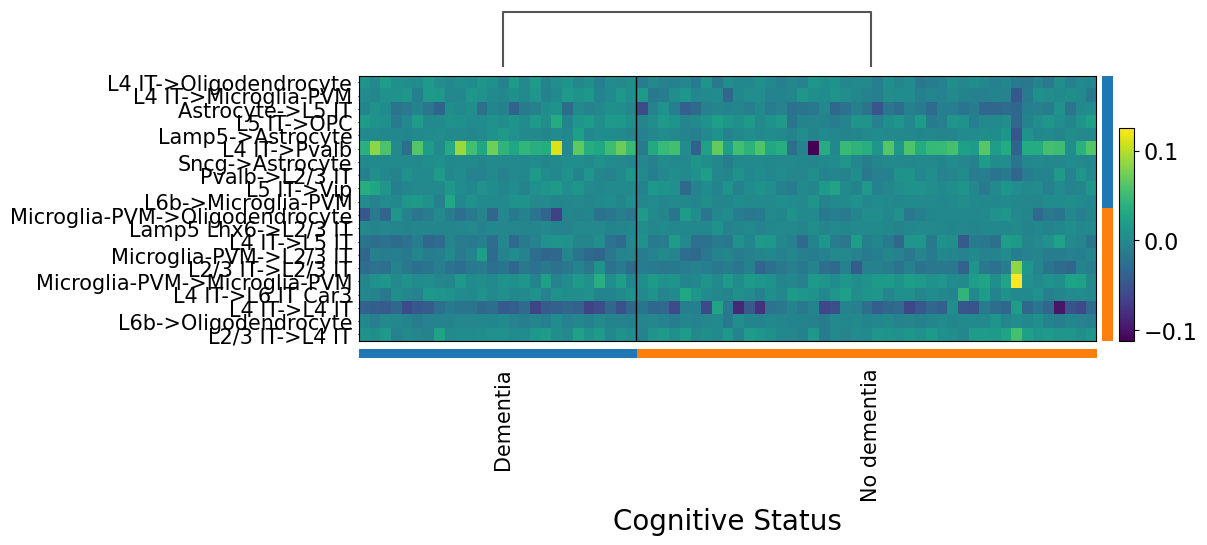

1 ['Astrocyte->L5 IT'] [0.1649074]
4 ['Microglia-PVM->Oligodendrocyte' 'Lamp5 Lhx6->L2/3 IT' 'L4 IT->L5 IT'
 'L5 IT->OPC'] [0.02763035 0.19696329 0.21083797 0.400361  ]


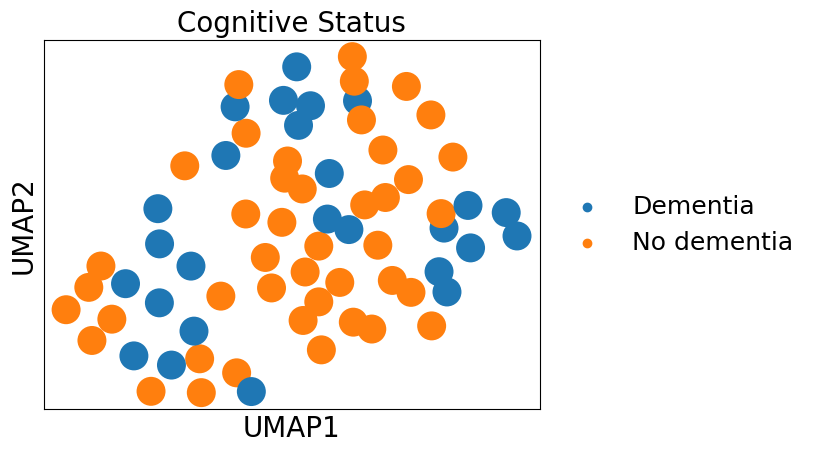

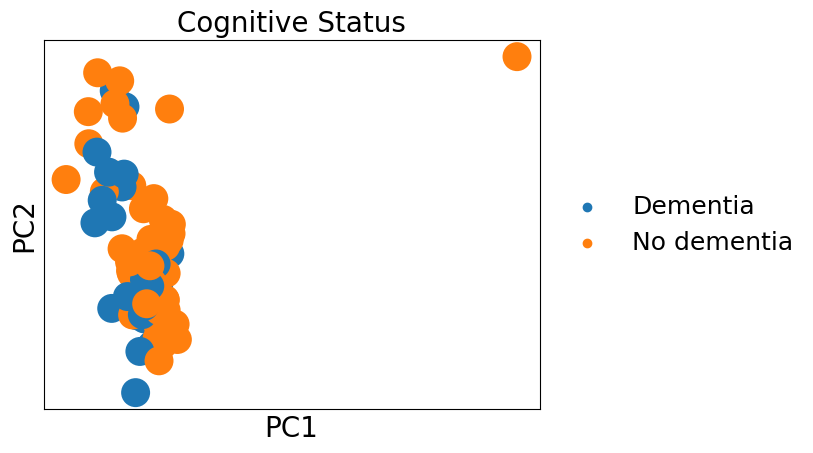

AnnData object with n_obs × n_vars = 69 × 67
    obs: 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status'
    uns: 'rank_genes_groups', 'Cognitive Status_colors', 'dendrogram_Cognitive Status', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'
AnnData object with n_obs × n_vars = 69 × 67
    obs: 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status'
    uns: 'rank_genes_groups', 'Cognitive Status_colors', 'dendrogram_Cognitive Status', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


In [16]:
adata_comp=None
for metai in ["Cognitive Status"]:
    adata_comp=plot_adata(adata,metai)
print(adata_comp)

(69, 576, 140)
(69, 80640)
Index(['Astrocyte->Astrocyte--GRIN2A', 'Astrocyte->Astrocyte--CACNA2D3',
       'Astrocyte->Astrocyte--ETNPPL', 'Astrocyte->Astrocyte--ROBO1',
       'Astrocyte->Astrocyte--RBFOX3', 'Astrocyte->Astrocyte--TENM2',
       'Astrocyte->Astrocyte--CLSTN2', 'Astrocyte->Astrocyte--HPSE2',
       'Astrocyte->Astrocyte--LRP1B', 'Astrocyte->Astrocyte--GPC5',
       ...
       'Vip->Oligodendrocyte--SLC32A1', 'Vip->Oligodendrocyte--FEZF2',
       'Vip->Oligodendrocyte--HS3ST2', 'Vip->Oligodendrocyte--GRIK3',
       'Vip->Oligodendrocyte--VIP', 'Vip->Pvalb--CLSTN2',
       'Vip->Pvalb--SLC24A2', 'Vip->Sst--CLSTN2', 'Vip->Sst--SLC24A2',
       'Vip->Sst--HS3ST2'],
      dtype='object', length=3075)
         Falling back to preprocessing with `sc.pp.pca` and default params.


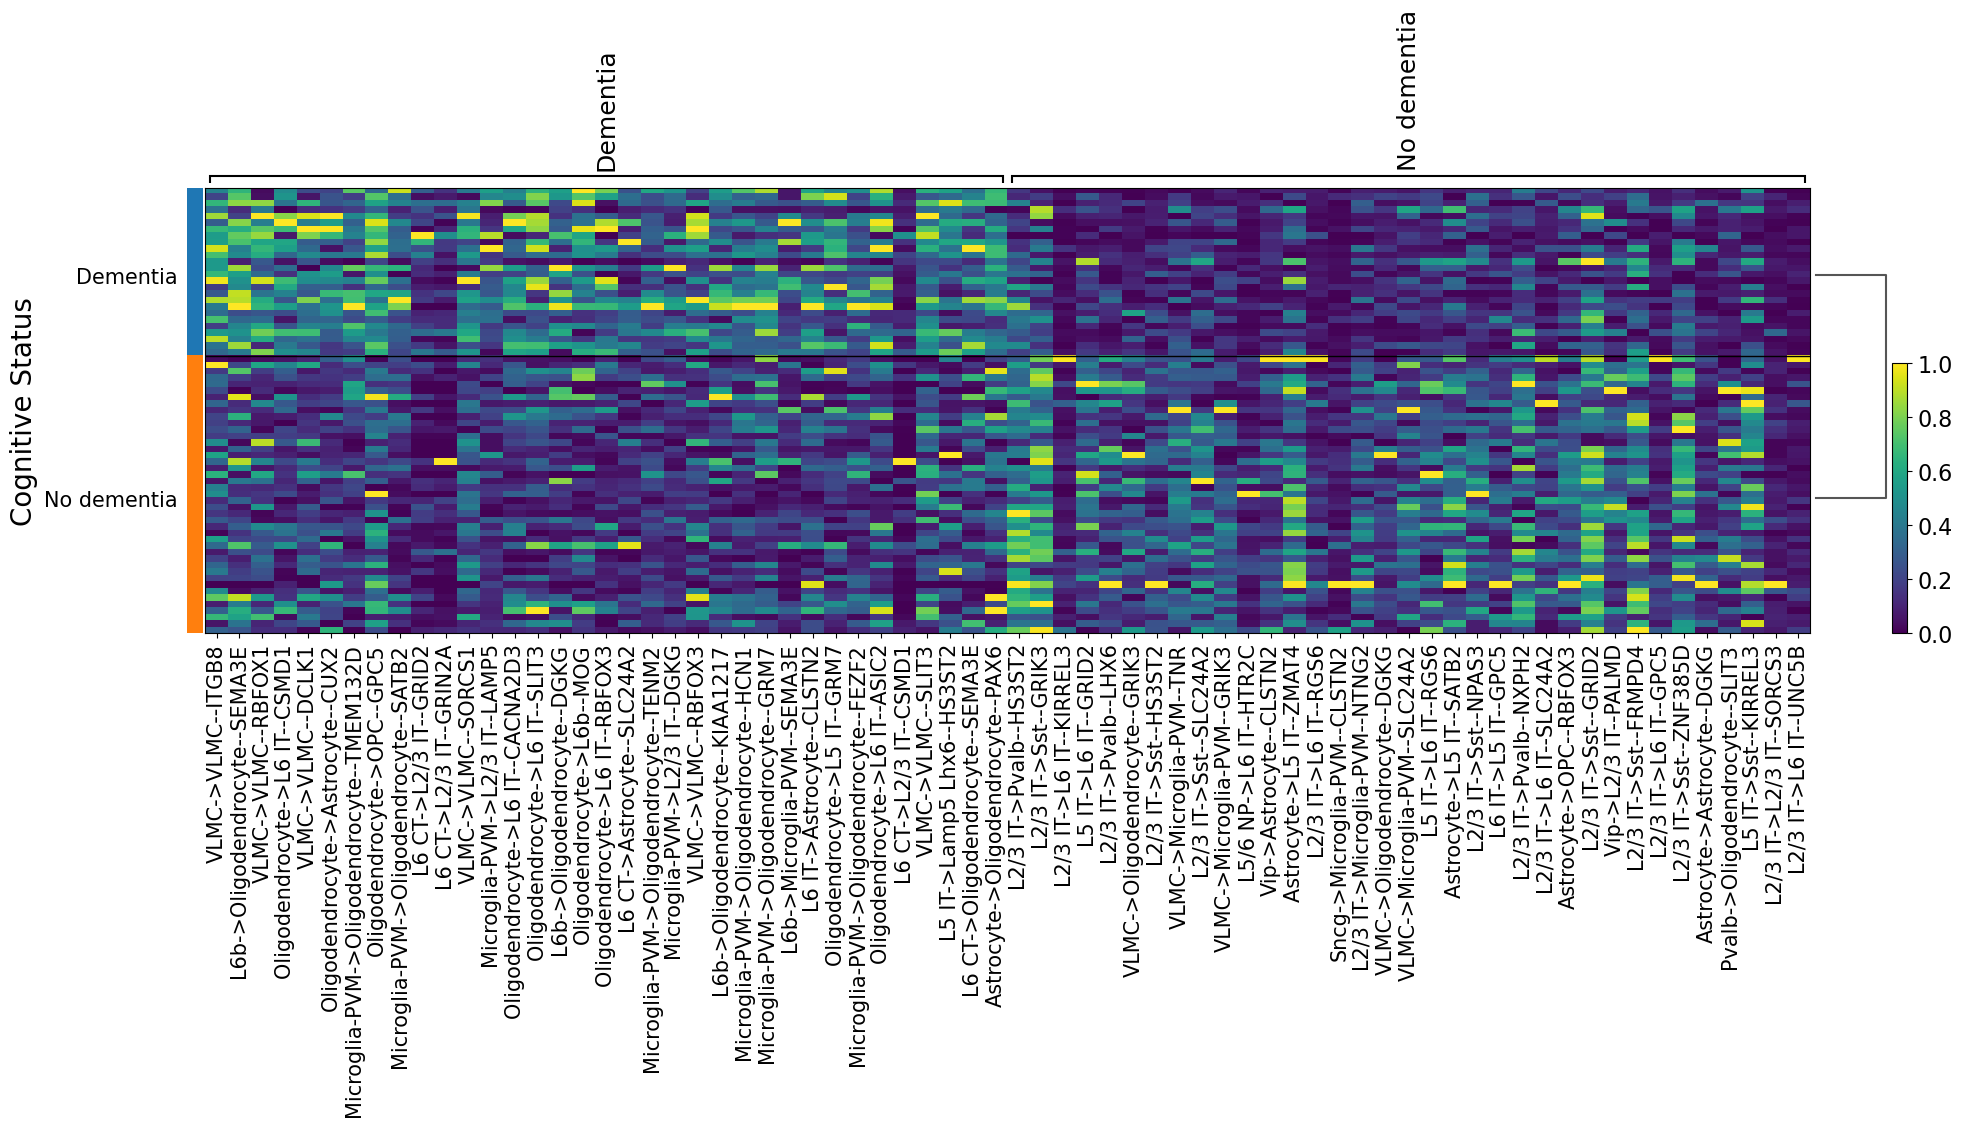

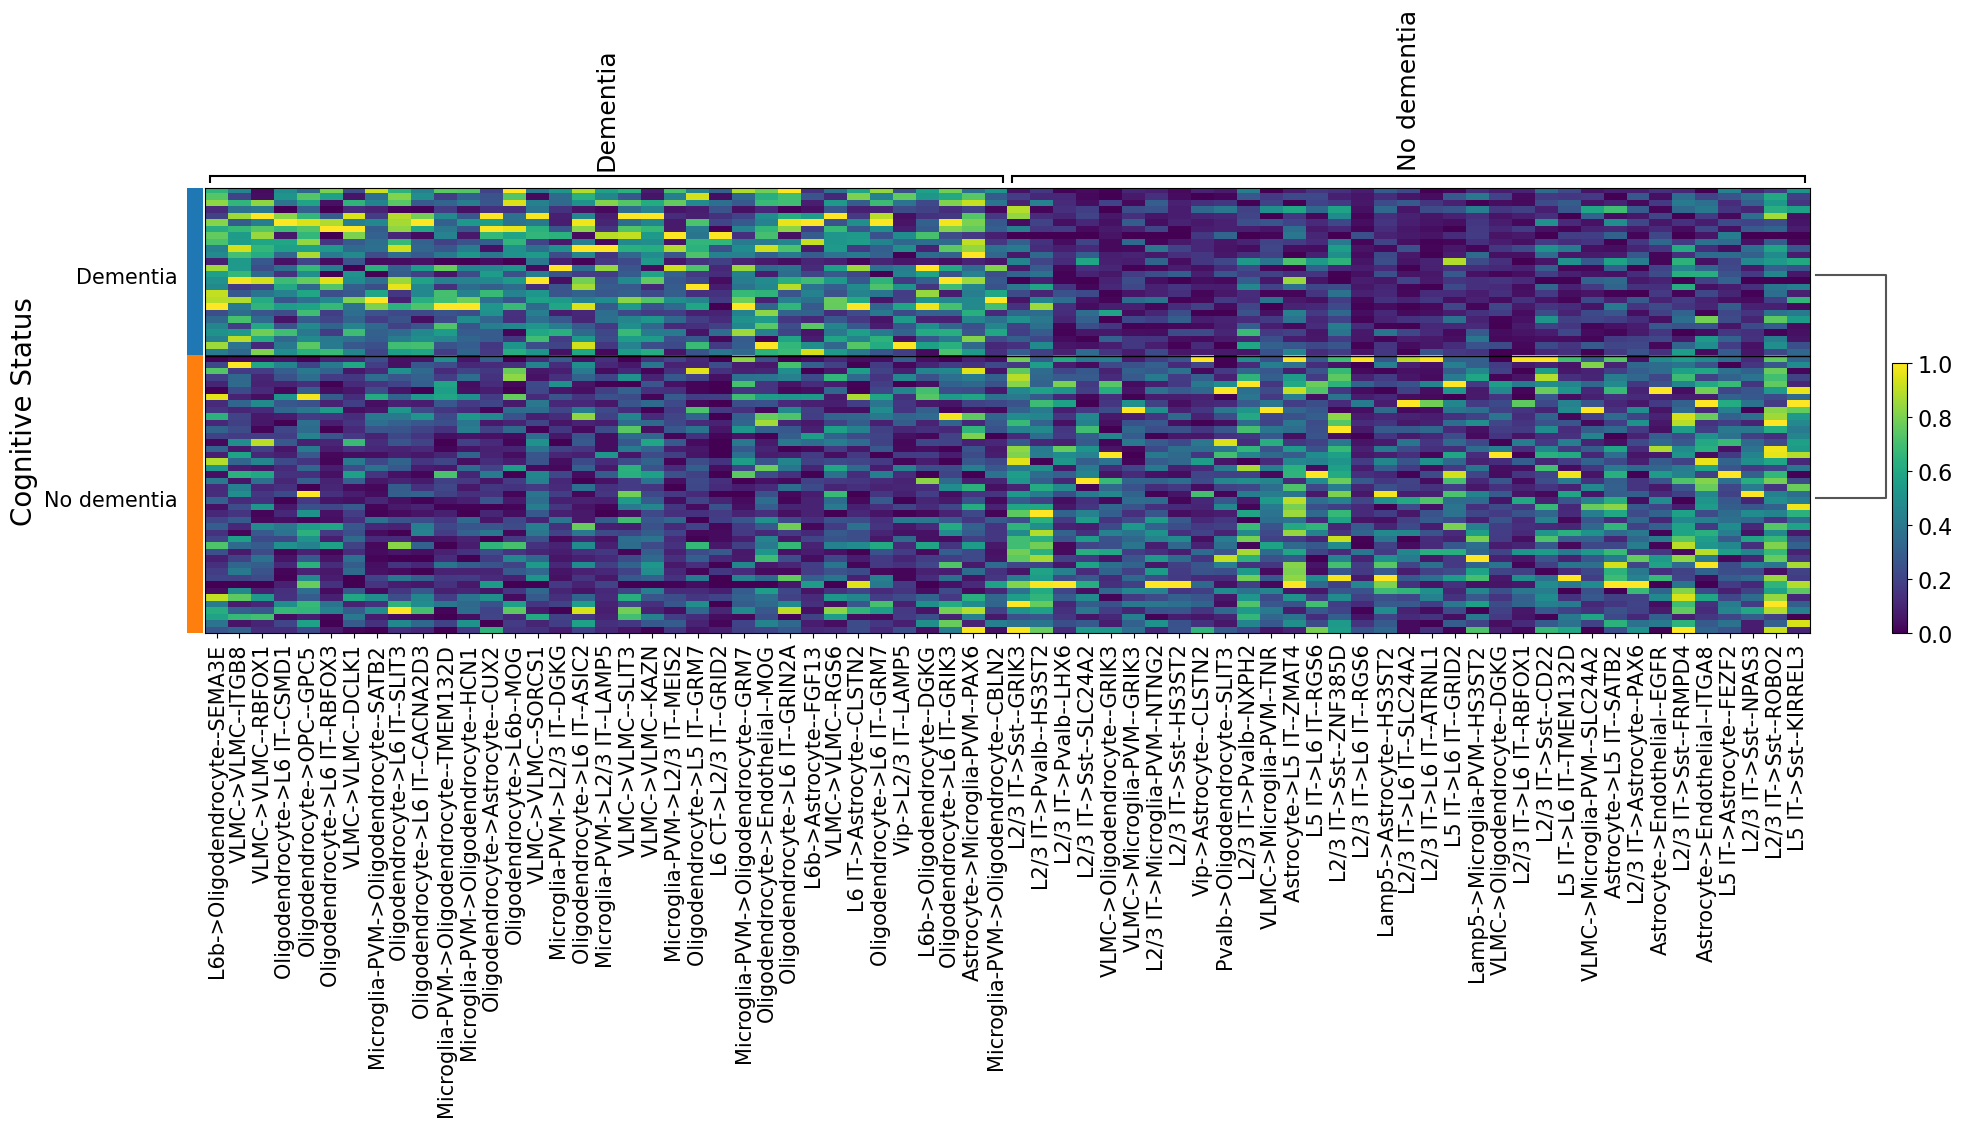

In [17]:
feature_names=[]
for i in range(len(cell_type_pair_sequence)):
    for j in range(len(genes)):
        feature_names.append(cell_type_pair_sequence[i]+"--"+genes[j])

adata_all=sc.AnnData(np.abs(strength[useful_index,:,:].reshape((np.sum(useful_index),-1))))
print(strength.shape)
print(adata_all.shape)
adata_all.var_names=feature_names
for metai in meta_rank.keys():
    adata_all.obs[metai]=metadata_df.loc[useful_sample,metai].values

adata_all=adata_all[:,np.sum(adata_all.X,axis=0)!=0]
print(adata_all.var_names)
sc.tl.rank_genes_groups(adata_all,groupby="Cognitive Status",method='wilcoxon',corr_method='benjamini-hochberg')
sc.pl.rank_genes_groups_heatmap(adata_all,n_genes=35,show_gene_labels=True,standard_scale='var',save="CCI_strength_DE.pdf")

sc.tl.rank_genes_groups(adata_all,groupby="Cognitive Status",method='t-test',corr_method='benjamini-hochberg')
sc.pl.rank_genes_groups_heatmap(adata_all,n_genes=35,show_gene_labels=True,standard_scale='var')

In [26]:
tmp=adata_all.uns['rank_genes_groups']['pvals_adj'].tolist()
tmp1=[min(x[0],x[1]) for x in tmp]
print(np.sort(np.array(tmp1)).tolist())

[0.030019698035365038, 0.030019698035365038, 0.030019698035365038, 0.030019698035365038, 0.030019698035365038, 0.030019698035365038, 0.037611916035137735, 0.037611916035137735, 0.037611916035137735, 0.037611916035137735, 0.04152473796377251, 0.04152473796377251, 0.045734364174468, 0.045734364174468, 0.045734364174468, 0.045734364174468, 0.05613191200039836, 0.05613191200039836, 0.05613191200039836, 0.05613191200039836, 0.05613191200039836, 0.05613191200039836, 0.05613191200039836, 0.05613191200039836, 0.05705098905457234, 0.05705098905457234, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.060057316660966156, 0.06033146988555869, 0.06033146988555869, 0.06033146988

(69, 3075)
[[0.00595319 0.04785088 0.03336433 ... 0.0019808  0.00140966 0.00384058]
 [0.04045293 0.07858368 0.03087221 ... 0.01342026 0.00322438 0.0175277 ]
 [0.02366824 0.08851774 0.04909638 ... 0.01428158 0.00371392 0.0013844 ]
 ...
 [0.04408045 0.02918453 0.00153221 ... 0.00713895 0.00162512 0.00602559]
 [0.01476528 0.07665469 0.00936237 ... 0.00163199 0.00310589 0.00215445]
 [0.04579373 0.05856647 0.01399711 ... 0.00520037 0.0014938  0.01743122]]


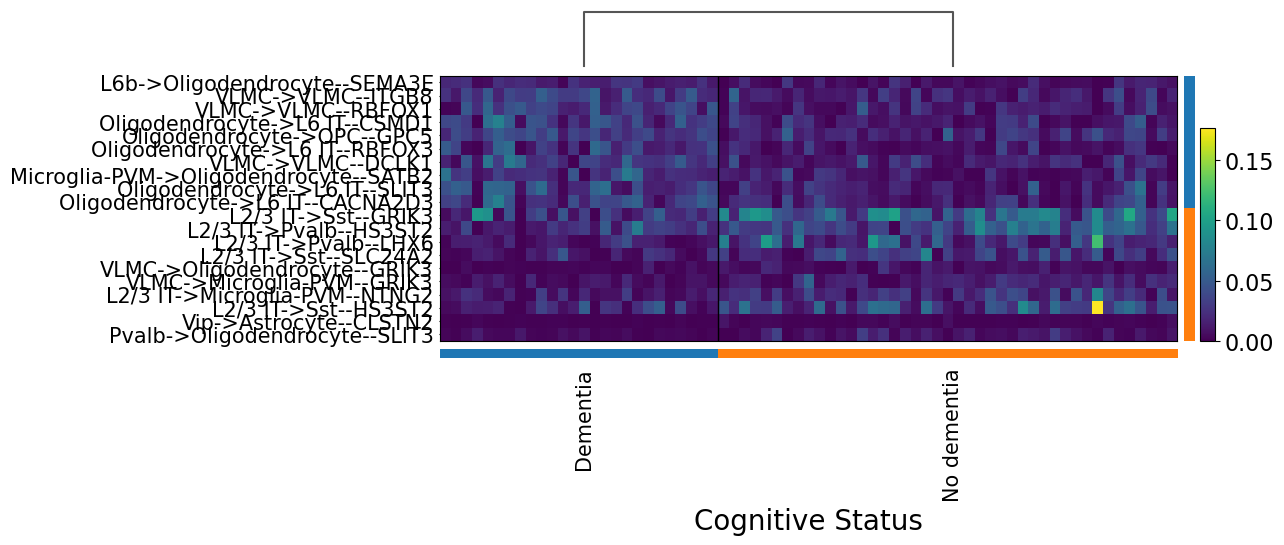

346 ['L2/3 IT->Pvalb--HS3ST2' 'L2/3 IT->Sst--GRIK3' 'L2/3 IT->Pvalb--LHX6'
 'L2/3 IT->Sst--SLC24A2' 'VLMC->Oligodendrocyte--GRIK3'
 'VLMC->Microglia-PVM--GRIK3' 'L2/3 IT->Microglia-PVM--NTNG2'
 'L2/3 IT->Sst--HS3ST2' 'Vip->Astrocyte--CLSTN2' 'L2/3 IT->Pvalb--NXPH2'
 'Pvalb->Oligodendrocyte--SLIT3' 'VLMC->Microglia-PVM--TNR'
 'Astrocyte->L5 IT--ZMAT4' 'L5 IT->L6 IT--RGS6' 'L2/3 IT->Sst--ZNF385D'
 'Lamp5->Astrocyte--HS3ST2' 'Lamp5->Microglia-PVM--HS3ST2'
 'L5 IT->L6 IT--GRID2' 'L2/3 IT->L6 IT--SLC24A2' 'L2/3 IT->L6 IT--RGS6'
 'L2/3 IT->L6 IT--ATRNL1' 'VLMC->Oligodendrocyte--DGKG'
 'L2/3 IT->Sst--CD22' 'L5 IT->L6 IT--TMEM132D' 'L2/3 IT->L6 IT--RBFOX1'
 'VLMC->Microglia-PVM--SLC24A2' 'Astrocyte->L5 IT--SATB2'
 'L2/3 IT->Astrocyte--PAX6' 'Astrocyte->Endothelial--EGFR'
 'Astrocyte->Endothelial--ITGA8' 'L2/3 IT->Sst--FRMPD4'
 'L5 IT->Astrocyte--FEZF2' 'L2/3 IT->Sst--NPAS3' 'L5 IT->Sst--KIRREL3'
 'L2/3 IT->Sst--ROBO2' 'L6 IT->L5 IT--GPC5' 'Lamp5->Astrocyte--SLC24A2'
 'L4 IT->L5 IT--ZMAT4' 'L2/

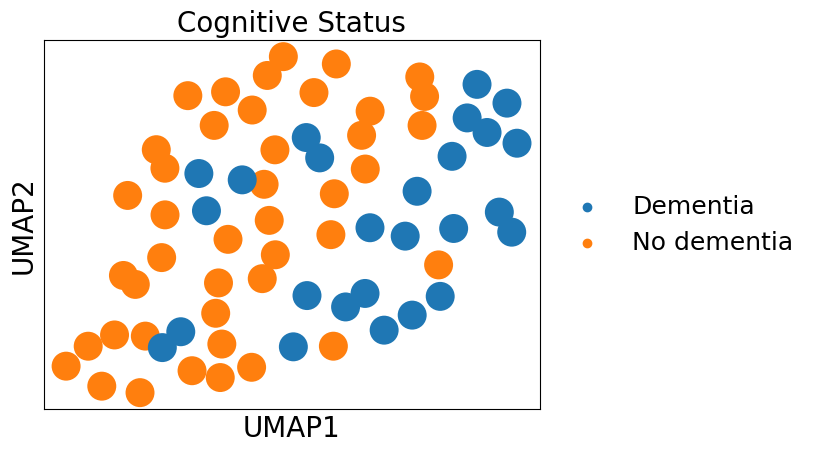

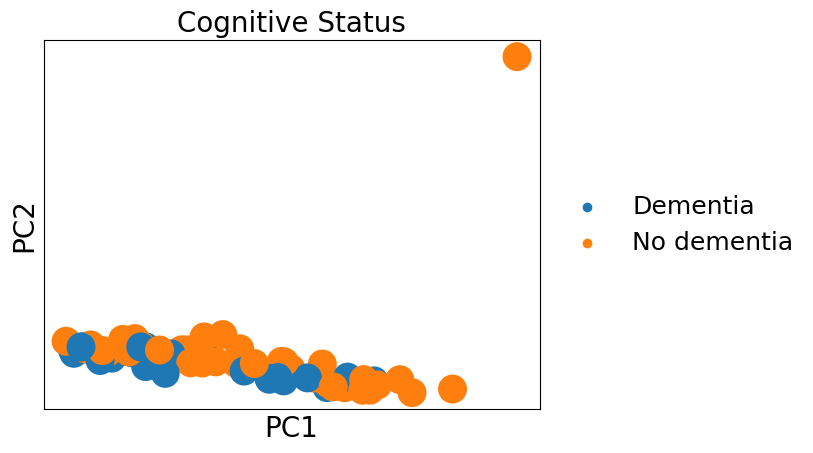

AnnData object with n_obs × n_vars = 69 × 3075
    obs: 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status'
    uns: 'rank_genes_groups', 'Cognitive Status_colors', 'dendrogram_Cognitive Status', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


AnnData object with n_obs × n_vars = 69 × 3075
    obs: 'Overall AD neuropathological Change', 'Thal', 'Braak', 'CERAD score', 'Overall CAA Score', 'Highest Lewy Body Disease', 'Atherosclerosis', 'Arteriolosclerosis', 'LATE', 'Cognitive Status'
    uns: 'rank_genes_groups', 'Cognitive Status_colors', 'dendrogram_Cognitive Status', 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [12]:
plot_adata(adata_all,"Cognitive Status")

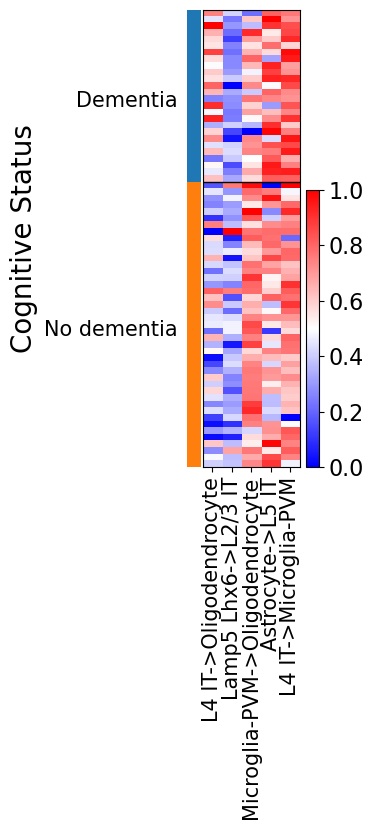

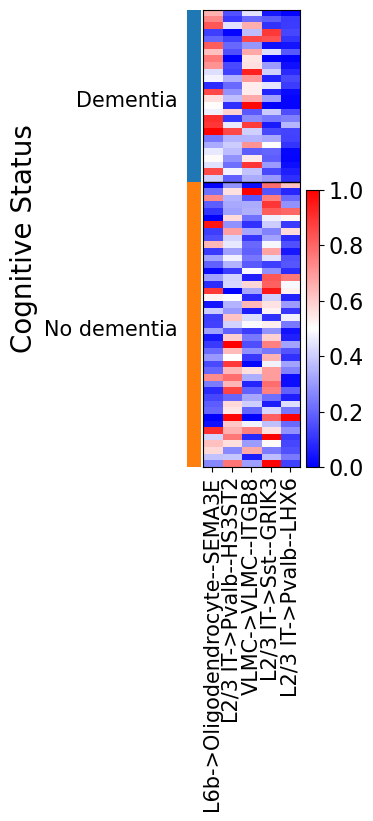

In [13]:
def plot_significant(adata,meta):
    results = adata.uns['rank_genes_groups']
    groups = results['names'].dtype.names  # Names of the groups

    # Initialize a set to collect unique significant genes
    significant_genes = set()
    
    # Iterate over all groups and select genes with p_adj < pval_threshold
    for group in groups:
        pvals_adj = results['pvals'][group]#['pvals_adj'][group]  # Adjusted p-values for the current group
        lfg=results['logfoldchanges'][group]
        cutoff1=np.sort(pvals_adj)[5]
        genes = results['names'][group]  # Gene names for the current group
        
        # Filter genes based on adjusted p-value threshold
        flag=(pvals_adj < cutoff1) #& (lfg>0)
        sig_genes = genes[pvals_adj < cutoff1]
        significant_genes.update(sig_genes)

    # Convert set to list for further use
    significant_genes = list(significant_genes)
    
    # Plot the heatmap with the significant genes
    sc.pl.heatmap(adata, var_names=significant_genes, groupby=meta,show_gene_labels=True,cmap='bwr',standard_scale='var')

plot_significant(adata_comp,"Cognitive Status")

sc.tl.rank_genes_groups(adata_all,groupby="Cognitive Status",method='t-test',corr_method='benjamini-hochberg')
plot_significant(adata_all,"Cognitive Status")